# Assignment 7 - Time Series Analysis
## Team - Name: NA
### Shailesh Sridhar: 01FB16ECS349
### Shashank Prabhakar: 01FB16ECS356
### Shrey Tiwari: 01FB16ECS368


#### Importing Packages

In [2]:
import seaborn as sns
import plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

#### Reading Datasets 

In [3]:
train = pd.read_csv("./StockTrain.csv")
test = pd.read_csv("./StockTest.csv")

### Question 1

##### a) Plot the closing price of Tesla stocks.

In [4]:
#PS: This plot requires internet access. It was plotted using plotly and is interactive with a slider.
#Please execute this cell to view the plot.

#Setting account credentials on Plotly

plotly.tools.set_credentials_file(username='shashankprabhakar', api_key='wdZOOKmWMCiXQJZYo5Wm')

import plotly.plotly as py
import plotly.graph_objs as go


trace = go.Scatter(x=train.date, y=train.close, name='Closing Price',mode='lines')

layout = dict(
    title='Closing Price Plot of Tesla Stocks',
    yaxis = dict(title = 'Stock Price in Dollars'),
    xaxis=dict(
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace]

figure = dict(data=data, layout=layout)
py.iplot(figure, filename='tesla closing')

##### b) Perform Rolling Mean smoothing  for Tesla stock closing  price with  window  size  = 4, 7 and 14. Plot them individually with the actual closing price. What do you observe?

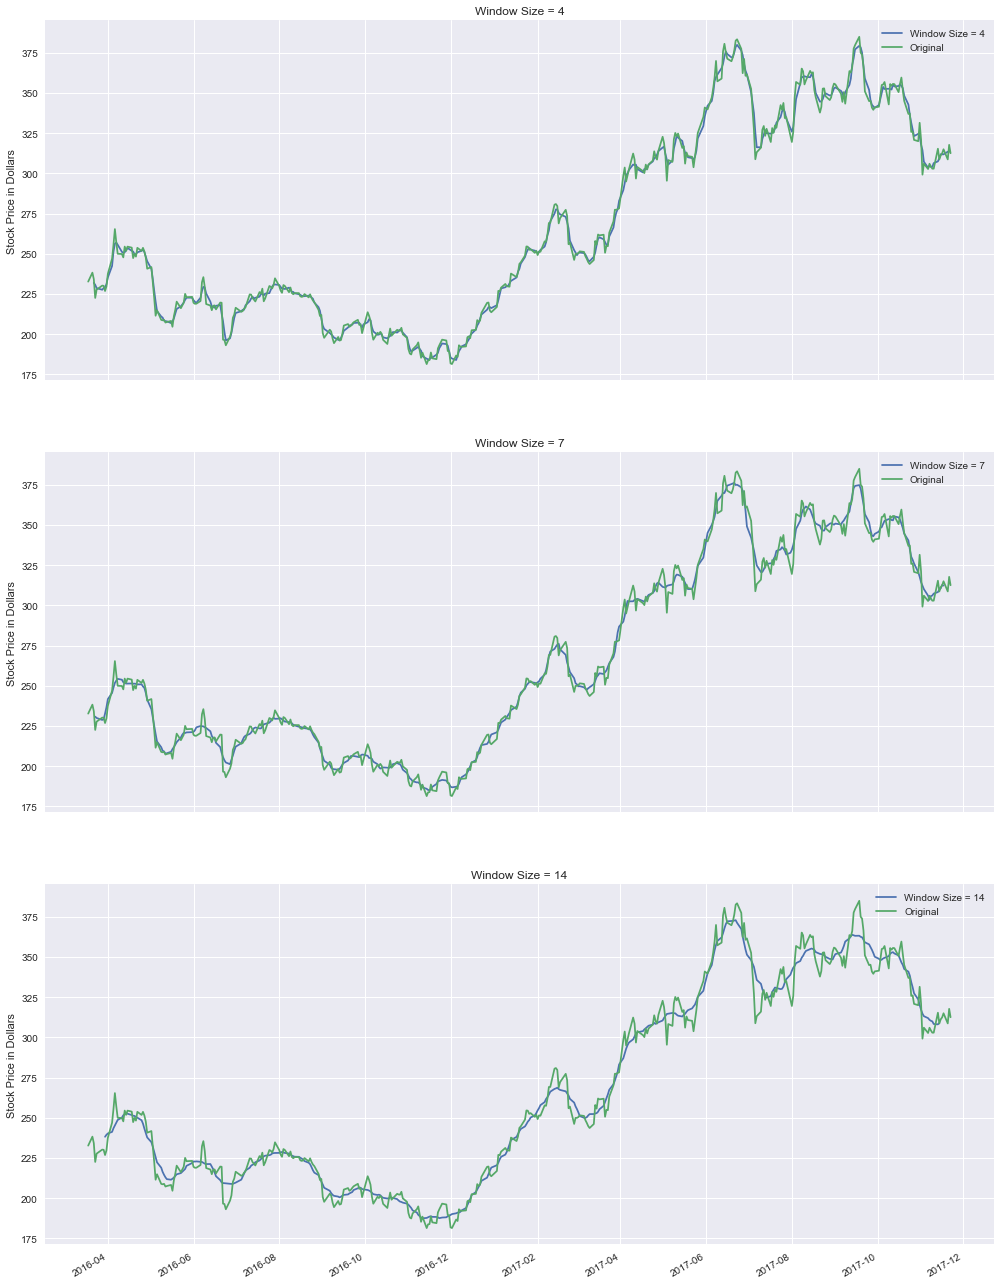

In [27]:
MA_4 = train['close'].rolling(window=4, center = True).mean()
MA_7 = train['close'].rolling(window=7, center = True).mean()
MA_14 = train['close'].rolling(window=14, center = True).mean()

dates = train['date']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (17,25))
axes[0].plot(pd.to_datetime(train['date']),MA_4)
axes[0].plot(pd.to_datetime(train['date']),train['close'])
axes[0].set_title('Window Size = 4')
axes[0].set_ylabel("Stock Price in Dollars")
axes[0].legend(['Window Size = 4','Original'])

axes[1].plot(pd.to_datetime(train['date']),MA_7)
axes[1].plot(pd.to_datetime(train['date']),train['close'])
axes[1].set_title('Window Size = 7')
axes[1].set_ylabel("Stock Price in Dollars")
axes[1].legend(['Window Size = 7','Original'])

axes[2].plot(pd.to_datetime(train['date']),MA_14)
axes[2].plot(pd.to_datetime(train['date']),train['close'])
axes[2].set_title('Window Size = 14')
axes[2].set_ylabel("Stock Price in Dollars")
axes[2].legend(['Window Size = 14','Original'])
fig.autofmt_xdate()


Observations:<br>
We see from the graphs above that as the window size increases, the Rolliing Mean Smoothing curves become more edge-free and the smoothening is more aggressive. Smoothing with window size 4 is closest to the original data, and in smoothing with window size 14, the deviation of smooth curve from the original curve is more. The overall trend in data is captured better with window size 14 and it gives a better general picture of the data.

### Question 2

##### Decompose the closing price into trend, season and residual for frequency 16, 80, 200. Comment on seasonality based on the plots. Which frequency seems to represent right seasonality of the time series. 

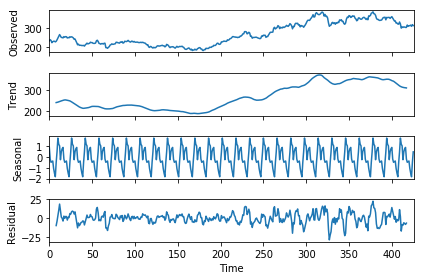

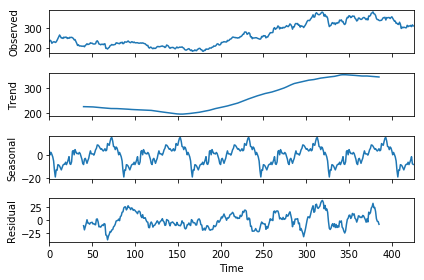

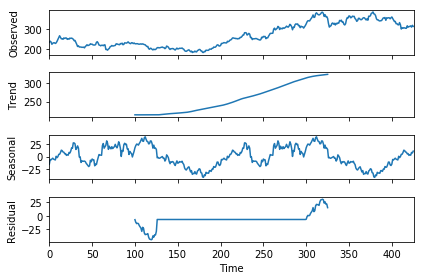

In [5]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from matplotlib.pyplot import figure
from statsmodels.tsa.seasonal import seasonal_decompose

series = [train['close']]

#For frequency 16
result_16 = seasonal_decompose(series, model='additive', freq=16)

#For frequency 80
result_80 = seasonal_decompose(series, model='additive', freq=80)

#For frequency 200
result_200 = seasonal_decompose(series, model='additive', freq=200)

result_16.plot()
pyplot.show()
print("\n\n")

result_80.plot()
pyplot.show()
print("\n\n")

result_200.plot()
pyplot.show()
print("\n\n")

The plot with frequency 16 represents the seasonality of the time series assuming a shorter timespan as the series's period. It maintains the trend details and also reveals seasonality patterns. However, it is not clear whether plot with frequency 80 represents the correct seasonality of the time series as it does aggressive smoothing and the trend details are lost.

There is no one specific correct answer that can clearly represent the seasonality of the time series data.

### Question 3


##### a)  Is the Closing price a stationary time series? Perform Augmented Dickey Fuller test to verify.  If not, convert to stationary using ordered differences.  

In [25]:
x = len(train)

p1 = train[:x//4]
p2 = train[x//4:(2*x)//4]
p3 = train[(2*x)//4:3*x//4]
p4 = train[3*x//4:]

m1 = np.mean(p1.close)
v1 = (p1.close).var()

m2 = np.mean(p2.close)
v2 = (p2.close).var()

m3 = np.mean(p3.close)
v3 = (p3.close).var()

m4 = np.mean(p4.close)
v4 = (p4.close).var()

print("MEANS:")
print("Mean1: ", m1)
print("Mean2: ", m2)
print("Mean3: ", m3)
print("Mean4: ", m4)

print("\nVARIANCES:")
print("Var1: ", v1)
print("Var2: ", v2)
print("Var3: ", v3)
print("Var4: ", v4)

MEANS:
Mean1:  226.732641509434
Mean2:  204.53682242990655
Mean3:  295.2720754716981
Mean4:  341.59850467289715

VARIANCES:
Var1:  227.92504819407006
Var2:  216.15062377005825
Var3:  1549.8195042228203
Var4:  432.44782793158174


Thus due to large difference in the variances and the inconsistent values of the mean we speculate that the data is not a stationary time series.

Now to test our speculation, we perform the Augmented Dickey Fuller test.

In [23]:
#Augmented Dickey Fuller Test.
from statsmodels.tsa.stattools import adfuller, kpss

def test_for_stationarity(y):
    #Performing Augmented Dickey Fuller test
    print('Results of Augmented Dickey-Fuller test:\n')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', 'Number of lags', 'Number of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)
    
test_for_stationarity(train['close'])

Results of Augmented Dickey-Fuller test:

test statistic             -1.038220
p-value                     0.739070
Number of lags              3.000000
Number of observations    422.000000
Critical Value (1%)        -3.445941
Critical Value (5%)        -2.868413
Critical Value (10%)       -2.570431
dtype: float64


Because the test statistic is above the 5% critical value and the p-value is larger than 0.05 the moving average is not constant over time and this confirms our speculation (the time series is not stationary).

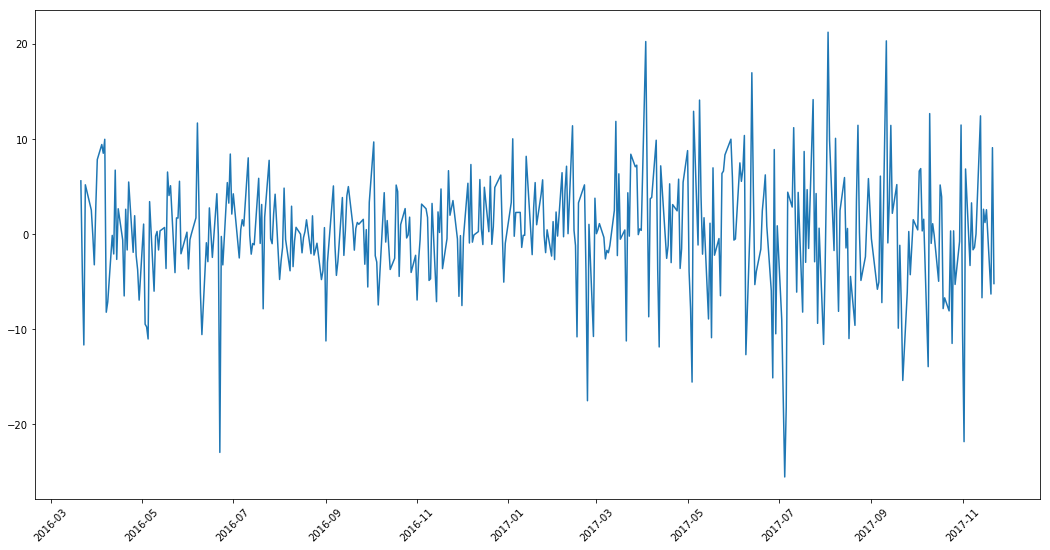

Results of Augmented Dickey-Fuller test:

test statistic           -1.251422e+01
p-value                   2.633339e-23
Number of lags            2.000000e+00
Number of observations    4.220000e+02
Critical Value (1%)      -3.445941e+00
Critical Value (5%)      -2.868413e+00
Critical Value (10%)     -2.570431e+00
dtype: float64


In [30]:
#Converting to a stationary wave.
x = train['close'] - train['close'].shift()
plt.figure(figsize = (18, 9))
plt.plot(pd.to_datetime(train['date']),x)
plt.xticks(rotation = 45)
plt.show()

x.dropna(inplace=True)
test_for_stationarity(x)

Here, after performing ADF test on the ordered difference data, we see that p-value is << 0.05 and test statistic is lesser than 5% critical value, this series is now stationary.

##### ii) Remove Seasonality, and plot ACF and PACF plots and get the best parameter (using RMSE) for SARIMAX model for the AIC metric.

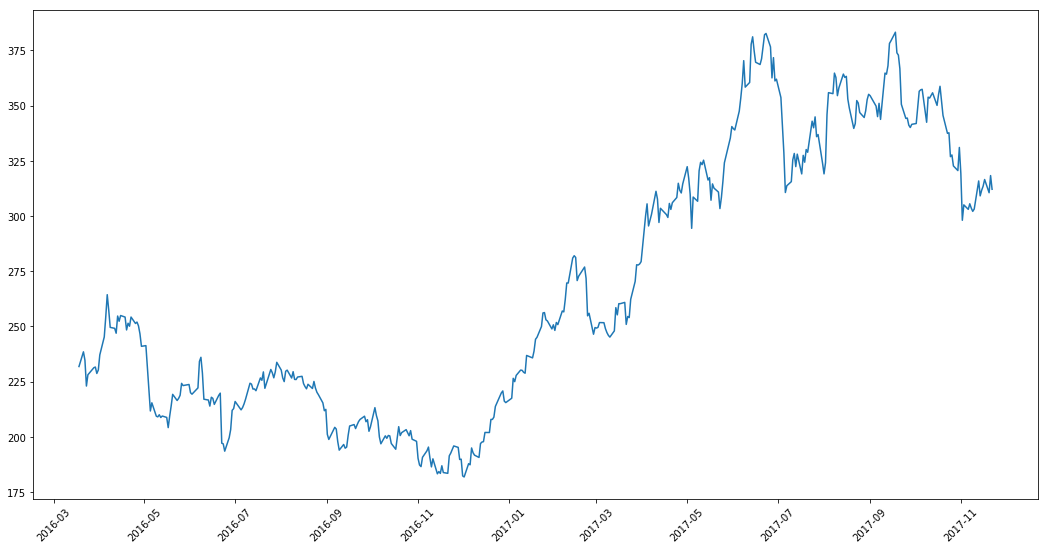

In [11]:
#Removing seasonality

'''#Create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# define a dataset with a linear trend
pyplot.figure(figsize = (18, 9))
pyplot.plot(pd.to_datetime(train.date), train.close)
pyplot.xticks(rotation = 45)
pyplot.ylabel("Closing Price")
pyplot.xlabel("Date")
pyplot.show()

# difference the dataset
diff = difference(train.close, x//2)

pyplot.figure(figsize = (18, 9))
pyplot.plot(diff)
pyplot.xticks(rotation = 45)
pyplot.ylabel("Closing Price")
pyplot.xlabel("Date")
pyplot.show()'''


#Assuming freq =16 represents seasonality correctly
seasonality = seasonal_decompose(series, model='additive', freq=16)
remove_seasonality = train.close - seasonality.seasonal
plt.figure(figsize = (18, 9))
plt.plot(pd.to_datetime(train['date']),remove_seasonality)
plt.xticks(rotation = 45)
plt.show()


Thus we can see that the seasonality has been removed

#### Plotting ACF and PACF plots

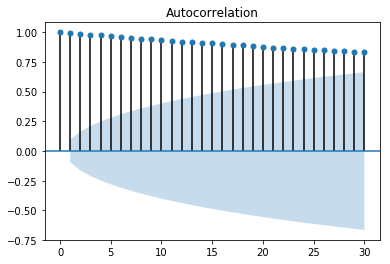

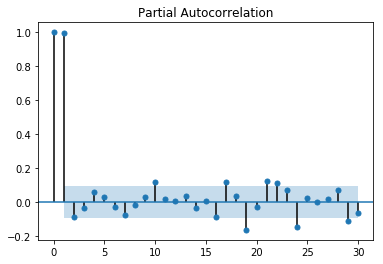

In [32]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(remove_seasonality,lags=30)
plot_pacf(remove_seasonality, lags=30)
plt.show()

Sarimax model for AIC

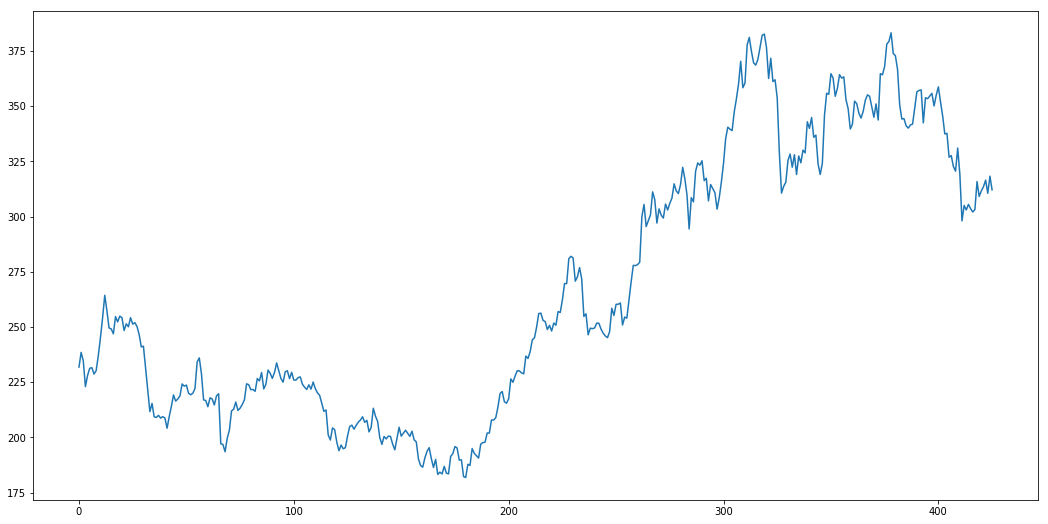

                           Statespace Model Results                           
Dep. Variable:                  close   No. Observations:                  426
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1367.365
Date:                Wed, 31 Oct 2018   AIC                           2738.731
Time:                        00:59:47   BIC                           2746.835
Sample:                             0   HQIC                          2741.932
                                - 426                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0618      0.042      1.479      0.139      -0.020       0.144
sigma2        36.4803      1.869     19.514      0.000      32.816      40.144
Ljung-Box (Q):                       43.68   Jarque-

In [54]:
from statsmodels.tsa.statespace import sarimax

mod = sarimax.SARIMAX(remove_seasonality, order=(1, 0, 1))  
res = model.fit(disp=-1) 
plt.figure(figsize = (18, 9))
plt.plot(remove_seasonality)
plt.show()
print(res.summary())

### Question 4<br>

##### a) What features do you think are useful in predicting closing price of the stock? Use information from the dataset given, as well as engineer new features.

Getting the feel of the dataset

In [13]:
#The description of the dataset
train.describe()

,close,volume,open,high,low
count,426.000000,4.260000e+02,426.000000,426.000000,426.000000
mean,267.063333,5.482814e+06,267.175082,270.867827,263.160329
std,59.900687,2.957186e+06,60.087324,60.633653,58.982743
min,181.450000,1.658616e+06,182.510000,184.730000,178.190000
25%,215.587500,3.562156e+06,216.157500,219.352500,213.132500
50%,250.555000,4.760368e+06,249.780000,253.775000,247.475000
75%,322.437500,6.584619e+06,320.110000,326.917500,316.265000
max,385.000000,2.370610e+07,386.690000,389.610000,379.345000


Looking at the summary of the data we can see that the attributes open, close, high, low are very similar to each other.<br>
We also see that the volume attribute has the maximum variation, mean and range of values.<br>
Thus if we were to perform PCA on the dataset we would see that volume would be the attribute contributing the most towards the dataset's variation.

In [15]:
#The correlation matrix for the dataset
train.corr()

,close,volume,open,high,low
close,1.000000,0.349338,0.995940,0.998369,0.998540
volume,0.349338,1.000000,0.353293,0.366968,0.334407
open,0.995940,0.353293,1.000000,0.998632,0.998272
high,0.998369,0.366968,0.998632,1.000000,0.998503
low,0.998540,0.334407,0.998272,0.998503,1.000000


As we can see, the volume attribute has the least correlation with any of the other attributes. The attributes opening price, closing price, day's high, day's low are all very closely correlated.<br>
Hence it would be justifiable to select any one of the attributes open, high and low to predict the closing price of the stock.<br><br>
Also, it is very important to note that date had been dropped out of the correlation matrix. But from the above visualizations it is clear that date plays an important role in determining the closing price of the Tesla stocks.

#### Creating a new fields to capture the data from all the three attributes <br>(open, high, low)


In [19]:
#The dataset looks like:
train.head(10)

,date,close,volume,open,high,low
0,2016-03-18 00:00:00,232.74,4704761.0,229.100,234.4800,228.060
1,2016-03-21 00:00:00,238.32,5289014.0,235.340,239.8800,235.000
2,2016-03-22 00:00:00,234.24,4303052.0,237.210,238.9900,232.558
3,2016-03-23 00:00:00,222.58,4936203.0,232.370,234.7300,222.030
4,2016-03-24 00:00:00,227.75,4956604.0,215.780,228.8877,215.000
5,2016-03-28 00:00:00,230.26,3878599.0,231.610,234.8100,225.000
6,2016-03-29 00:00:00,230.13,4006037.0,229.890,232.3800,225.330
7,2016-03-30 00:00:00,226.89,4025670.0,235.090,235.5000,226.500
8,2016-03-31 00:00:00,229.77,7975638.0,229.340,237.4200,225.010
9,2016-04-01 00:00:00,237.59,15979910.0,244.825,247.9000,233.250


It is intuitive that there is always some natural ordering to the values of the attributes open, high, low.<br>
Hence we discourage the use of median as a combinating statistic for these three features.<br><br>

Idea behind creating the new column HL_Mean:<br>
Mean is the simpliest, yet can be a reliable combining statistic for these features.<br>
It is also agreeable that Low <= Open and High >= Open. This makes high and low better trend capturing attributes. 

In [71]:
#Engineering the new attribute HL_Mean:

#Finding the mean.
temp = (train.low + train.high)/2

#Creating a new dataframe:
train_new = train
train_new = train_new.assign(HL_Mean = temp)
train_new = train_new.drop(['open', 'high', 'low'], axis = 1)
train_new.head(5)

,date,close,volume,HL_Mean
0,2016-03-18 00:00:00,232.74,4704761.0,231.27000
1,2016-03-21 00:00:00,238.32,5289014.0,237.44000
2,2016-03-22 00:00:00,234.24,4303052.0,235.77400
3,2016-03-23 00:00:00,222.58,4936203.0,228.38000
4,2016-03-24 00:00:00,227.75,4956604.0,221.94385


In [72]:
#The correlation between the new column and closing price is:
train_new.corr()

,close,volume,HL_Mean
close,1.000000,0.349338,0.998827
volume,0.349338,1.000000,0.351044
HL_Mean,0.998827,0.351044,1.000000


##### b) Use the features you stated in (a) to a build a linear regression model to predict stock close price. Compute RMSE on the Train and Test datasets.

<br>Creating a model for predecting the closing prices of the stocks.

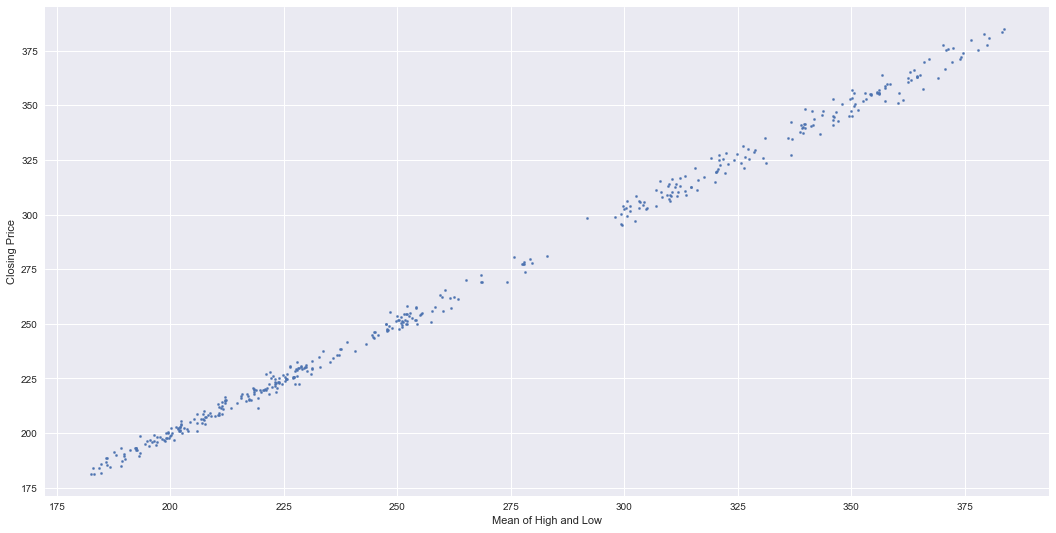

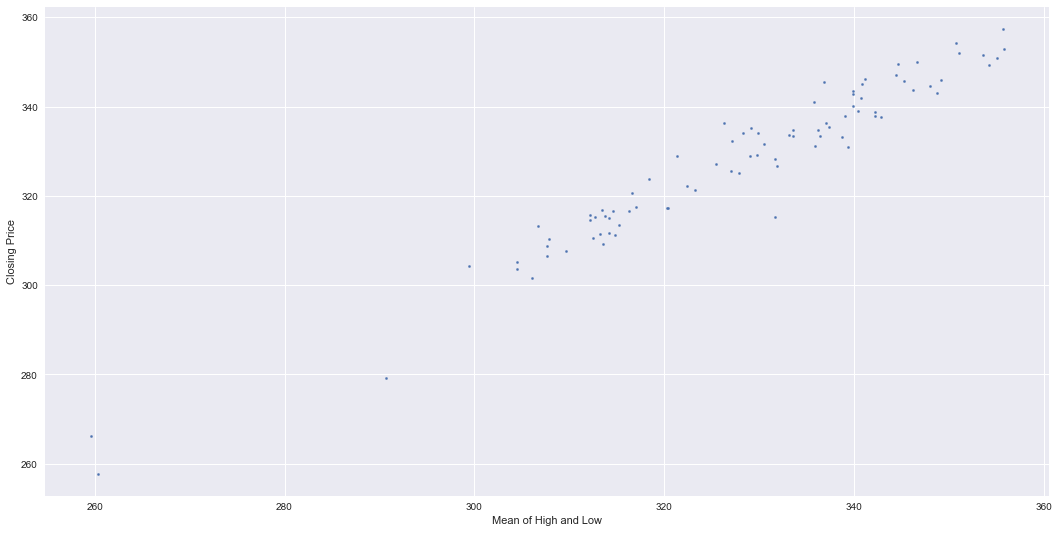

The RMSE value for training dataset is:  2.8969922168393527
The model score for training dataset is:  0.997655491973 


The RMSE value for testing dataset is:  4.2994285249151645
The model score for testing dataset is:  0.944806873481


In [97]:
#Visualising the training data:
plt.figure(figsize = (18,9))
plt.scatter(train_new.HL_Mean, train_new.close, s = 5)
plt.xlabel("Mean of High and Low")
plt.ylabel("Closing Price")
plt.show()

#Visualising the testing data:
plt.figure(figsize = (18,9))
plt.scatter(test_new.HL_Mean, test_new.close, s = 5)
plt.xlabel("Mean of High and Low")
plt.ylabel("Closing Price")
plt.show()

#Using linear regression model for prediction:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(train_new[['HL_Mean']], train_new[['close']])

#Test dataset:
x = (test['low'] + test['high'])/2
test_new = test.assign(HL_Mean = x)

#Testing:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Evaluation for training dataset
score1 = lm.score(train_new[['HL_Mean']], train_new[['close']])
predicted1 = lm.predict(train_new[['HL_Mean']])
rmse1 = sqrt(mean_squared_error(predicted1, train_new.close))

print("The RMSE value for training dataset is: ", rmse1)
print("The model score for training dataset is: ", score1, "\n\n")

#Evaluation for testing dataset
score2 = lm.score(test_new[['HL_Mean']], test_new[['close']])
predicted2 = lm.predict(test_new[['HL_Mean']])
rmse2 = sqrt(mean_squared_error(predicted2, test_new.close))

print("The RMSE value for testing dataset is: ", rmse2)
print("The model score for testing dataset is: ", score2)

###### Trying to get new findings. Trying to see correlation between (high - low) and closing price 

In [12]:

temp = train.high - train.low
train_new1 = train
train_new1 = train_new1.assign(diff = temp)
train_new1 = train_new1.drop(['open', 'high', 'low'], axis = 1)
train_new1.corr()

,close,volume,diff
close,1.000000,0.349338,0.447010
volume,0.349338,1.000000,0.689372
diff,0.447010,0.689372,1.000000


Correlation is low. Is there any other way we can go about this? 

###### Is Volume really useful?

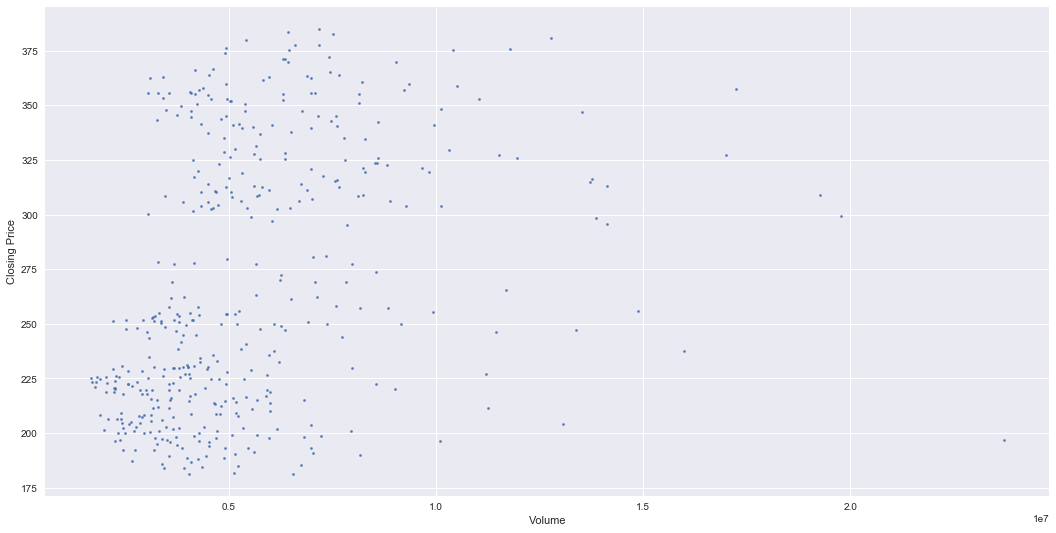

In [14]:
plt.figure(figsize = (18,9))
plt.scatter(train_new1.volume, train_new1.close, s = 5)
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.show()

For the same volume of trade we have many closing prices. This probably implies that volume attribute could exist 
just for logging purpose and may not really help with prediction with closing price.